## Overview of Sckit-Learn library

![Scikit Learn Logo](images/scikit_learn1.PNG)

## What is Machine Learning

Fundamentally, Machine Learning involves building mathematical models to help understand data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

Machine learning can be categorized into two main types: supervised learning and unsupervised learning.

- Supervised learning involves somehow modelling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities
- Unsupervised learning involves modelling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data. [1]

## Overview of the scikit-learn library

Scikit-learn is said to be probably the most useful library for machine learning in Python. The scikit-learn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.  Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. 
Scikit-learn is a library that implements a range of machine learning, pre-processing, cross-validation and visualization algorithms using a unified interface.

Sckit-learn some features: 
- Open Source and commercially usable
- Simple and efficient tools for predictive data analysis
- Accessible to everybody
- Reusable in various contexts
- Built on NumPy, SciPy, and matplotlib

Components:
- Supervised learning algorithms: Scikit learn contains a wide range of superviosed learning alogrithms built in.
- Cross Vailidation – sckit learn comes built in with various methods to check the accuracy of a supervised models on unsee data 
- Unsupervised learning algorithms – scikit learn come built in with a large spread of machine learning alogritms from cluster, factor analysis to unsupervised neural networks.
- Sample datasets: various academic datasets come built in Iris, Boston houses prices etc can be used when testing and learning a new library.

Note that the scikit learn is used to build machine learning models. It should not be used for reading the data, manipulating and summarizing it. There are better libraries for that (e.g. NumPy, Pandas etc.) References [2][3]



### Processing and Testing my Selected Dataset

I have selected to use the Iris Data set for my data analysis and with it I will use some categorisatsion and regression algoritms whch are built into scikit-learn. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. [4]

![Iris Data Set](https://miro.medium.com/max/638/0*2c7voFri9cIXGrc4)

#### Next I'm going to Import required libraries

In [1]:
#import libraries as required 
import numpy as np

#import skitlearn library for ML 
import sklearn as sk
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split #for comparison to model

#import pandas for data frames
import pandas as pd

#import matplotlib and seaborn for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

#### Import my selected dataset

In [125]:
# Import the iris.csv dataset and name as df
df = pd.read_csv("datasets/iris/iris.csv") #using pandas read_csv function

One of the featres of sckit-learn as mentioned is the ability to acesss the Iris taset direclty from within scikit-learn and if rquired could be done per the code below:

In [126]:
from sklearn import datasets as datasets #have to import in the indivdual libraries for datasets

In [4]:
#import the dataset pre built into sckit learn if required 
#from sklearn.datasets import load_iris
#import sklearn.model_selection as mod
#import pandas as pd
#data = load_iris()

### Reviewing my Dataset

In [5]:
#review the dataset
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Learning about our data - we can use df.describe() and df.info() to learn more about our dataset.

In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see from above that there are 5 colums in the dataset, the last column is what we will be trying to predict in our categorsation algorithms further on and this colum will be the output. The rest of the colums will act as our features or inputs and we will use them to perform our predictions. I will define species (output) as catgory as shown below.

In [8]:
#after research define species as type category thanks to https://github.com/simonava5/fishers-iris-data
df['species'] = df['species'].astype('category') #category to be used for summary file

In [9]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Column species has now been converted to data type category rather than object.
I also note there are 150 values with no missing values (150 non null)

I use the value_counts() function to see how our output or target values are distibuted

In [10]:
#value counts function to count my categorical varibales 
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

All of our categories (species) have an equal number of examples: 50 each. This is a perfectly balanced data set in terms of target value distribution.

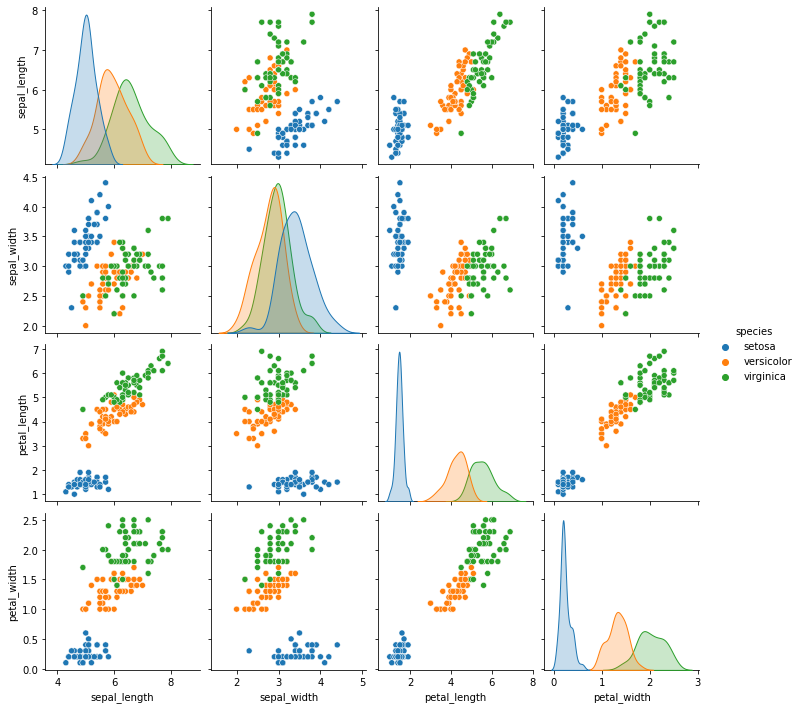

In [11]:
#### Visualise dataset - research into more interesting plots etc than just used in lecutures
sns.pairplot(df, hue='species');

### Demonstrations of sckit-learn algorithms

The algorithms that i selected from my research for futher investigation are a follows:

Categorisation
- Decision Tree (Decision Tree Classifier)
- Random Forest (Random Forest Classifier)
- Gradient Bossing (Gradient Boosting Classifier)

Regression
- Multple Linear Regression
- Decision Tree Regression (Decision Tree Regresor) for comparison purposes to classifier

#### A note on  Classification Alogorithims versus Regression Algorithms 

Classification refers to the task of giving a machine learning algorithm features, and having the algorithm put the instances/data points into one of many discrete classes. Classes are categorical in nature, it isn't possible for an instance to be classified as partially one class and partially another. A classic example of a classification task is classifying emails as either "spam" or "not spam" - there's no "a bit spammy" email.

There is an important difference between classification and regression problems.-  Fundamentally, classification is about predicting a label and regression is about predicting a quantity.
https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

Regressions are done when the output of the machine learning model is a real value or a continuous value. Such an example of these continuous values would be "weight" or "length". An example of a regression task is predicting the age of a person based off of features like height, weight, income, etc.

## Training and Testing our data for further analysis
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Before fitting data to a selected model and too check the accuracy of our model, we split the dataset into two pieces-a training 
set and a testing set. 

I will use training set to train the model and testing set to test the 
model. After that, we can will use our selected algoritms to check we well our they performed on our test data.

It is important that we should not testing our model on the data that we trained it on!

The following example will split the data into 60:40 ratio,  60% data will be used as 
training data and 40% will be used as testing data. We set out random state seed to 1, our random state ensures that the splits that we generate are reproducible.

I am going to use the module train_test_split built into sckit-learn to split my dataset into training and testing data.

In [12]:
#Split our data in trainng and testing models
train, test = mod.train_test_split(df,test_size=.40,random_state=1)

In [13]:
#displaying our training data
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica
123,6.3,2.7,4.9,1.8,virginica
12,4.8,3.0,1.4,0.1,setosa
2,4.7,3.2,1.3,0.2,setosa


In [14]:
#display our test data
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [15]:
#check the size of our testing model
test.index.size

60

All looks good, our training and test datasets look good and we have the corret size for our testing model that is 40% of 150 = 60

#### Now lets define our inputs and outputs 

In [57]:
#selecting our inputs and outputs 
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']

In [58]:
#look at our inputs
inputs.head()

,sepal_length,sepal_width,petal_length,petal_width
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


We can see above our input parameters all numbers

In [18]:
outputs.head()

11        setosa
113    virginica
123    virginica
12        setosa
2         setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

And we can see out output parameters all catgegories 

Next we start to fit the data to our models

__________________

## 1. __Classifcation analysis and predictions on Iris Data set using Decision Tree Algorithm__

![Decison Tree Algorithm](https://mljar.com/images/machine-learning/decision_tree_logo.png)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/tree.html#tree

__A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps us in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret. [7]__

I found this very interesting descitpion of clasification alogorithms from Data Camp [7] which i liked

_"As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience. As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a classification problem. Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem."_


In the following example we are going to use the DecisionTreeClassifier and futher down we will use the DecisionTreeRegressor for comparison purposes! [7]

### - Classification analysis and predictions on Iris Data set using the Decision Tree Algorithm

- __Import my required libraries and or modules__

In [59]:
#import required library and classifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

- __Create my new classifier using the DecisionTreeClassifier__

In [60]:
#create new classifier as dtc, set my random state
dtc = DecisionTreeClassifier (random_state=1)

- __Fit my data to my model using my inputs and outputs which were defined already__

In [61]:
#selecting our inputs and outputs 
#inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species'] - showing for illustraion only as already done
#fit
dtc.fit(inputs,outputs)

DecisionTreeClassifier(random_state=1)

- __Display on screen the predictions from the model__

In [22]:
#using new classifer decision tree algorithm classifty the test data
predictions = dtc.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
#display on screen
predictions

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor'], dtype=object)

- __Check how many it predicted right - we can see this using the value counts function__

In [23]:
#check how many were right predictions and how many were wrong
(predictions == test['species']).value_counts()

True     58
False     2
Name: species, dtype: int64

In [24]:
#use .score to see how many of the predictions are correct
dtc.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species'])

0.9666666666666667

- __Classification Report__

I can also use the Classification report available from sckit-learn to see how well model is doing with the predictions

In [25]:
#Classifcation report
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(test['species'],predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.95      0.95      0.95        21
   virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



The classification report compares the predictions we made for the target output  (species) with the real varibale species 
Not bad!! 97% accurate ... some like setosa for example with 100% accuracy.

""" need to add more on below"""

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, inputs,outputs, cv=10)

array([1.        , 1.        , 0.77777778, 1.        , 1.        ,
       0.88888889, 1.        , 1.        , 0.88888889, 0.88888889])

- __Visualise results__

There is also a handy feature named plot_tree which allows us generate a visual represenation of the Decision Tree.

No handles with labels found to put in legend.


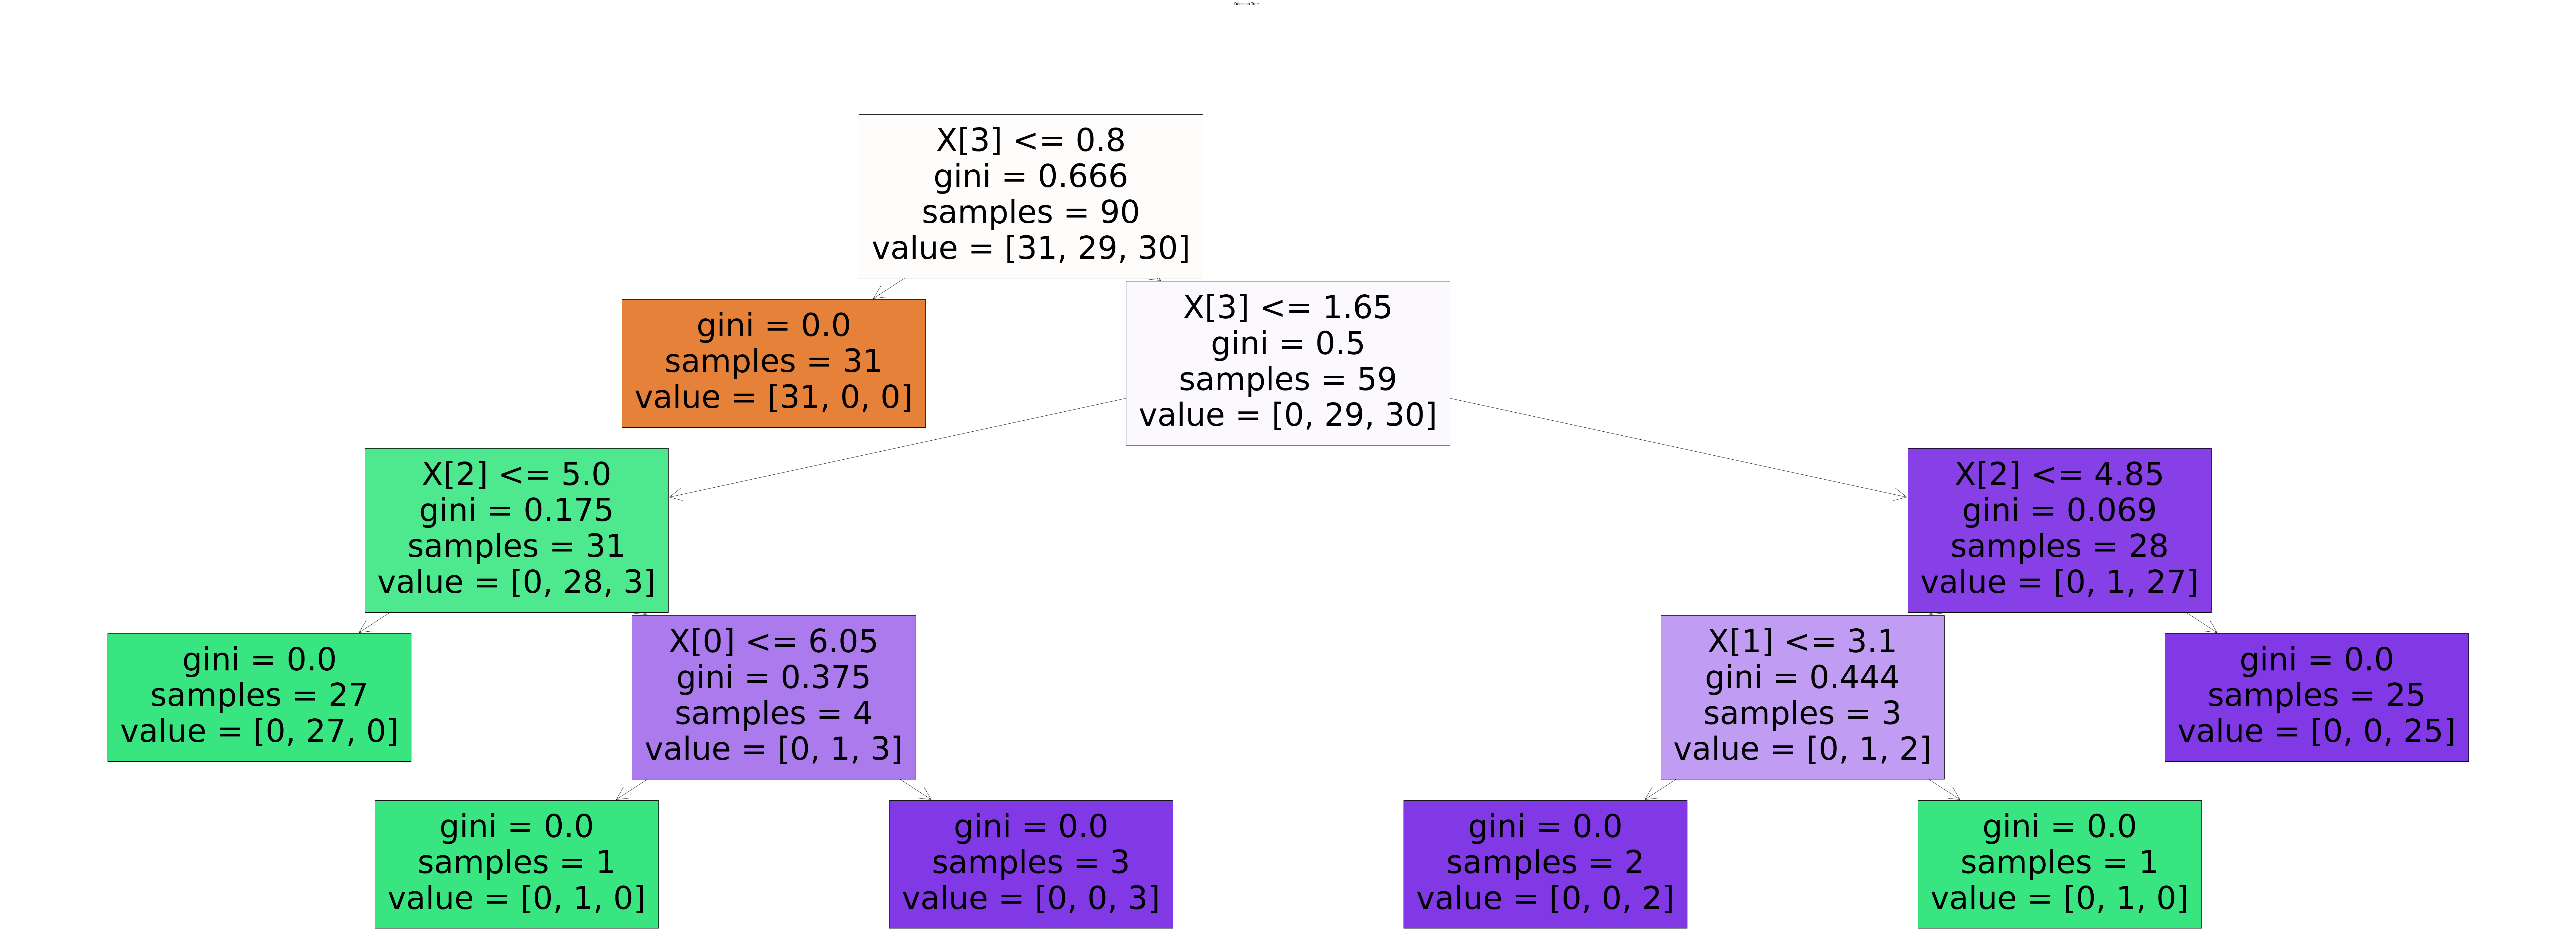

In [76]:
## need to read up more on this section to understand 
#plot results https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

plt.figure()
plt.rcParams["figure.figsize"] = (150,50)
plt.title("Decision Tree")
plt.suptitle("Decision Tree")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
#plt.axis("tight")

plot_tree(dtc, filled=True)
plt.show()

___________

## 2. __Classifcation analysis and predictions on Iris Dataset using Random Forest Algorithm__

![random forest](https://mljar.com/images/machine-learning/random_forest_logo.png)

__Random forest is a supervised learning algorithm which is used for both classification as well as regression. However, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result. [][]__

https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_random_forest.htm

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- __Import my required libraries and or modules__

In [62]:
#import required libraries
from sklearn.ensemble import RandomForestClassifier

- __Create my new classifier using the Random Forest Classifier__

In [63]:
rfc = RandomForestClassifier(random_state = 2)

- __Splitting into Train and Test datasets and defining inputs and outputs (this is done already this is just for illustration )__

In [30]:
#Split our data in traing and testing models
#train, test = mod.train_test_split(df)
#train, test = mod.train_test_split(df,test_size=.40,random_state=1)
#selecting our inputs and outputs 
#inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']

- __Fit my data to my model using my inputs and outputs which were defined already__

In [71]:
#fit to our model
rfc.fit(inputs,outputs)

RandomForestClassifier(random_state=2)

- __Display on screen the predictions from the model__

In [72]:
predictions_rfc = rfc.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
predictions_rfc

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor'], dtype=object)

- __Check how many it predicted right - we can see this using the value counts function__

In [73]:
(predictions_rfc == test['species']).value_counts()

True     58
False     2
Name: species, dtype: int64

In [74]:
#use .score to see how many of the predictions are correct
rfc.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species'])

0.9666666666666667

- __Visualise + Interpet Results__

In [78]:
### using classification repprt to display results 
print(classification_report(test['species'],predictions_rfc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.95      0.95      0.95        21
   virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



The classification report compares the predictions we made for the target output  (species) with the real varibale species 
Not bad!! 97% accurate ... some like setosa for example with 100% accuracy.

_________________

## 3. __Classification analysis and predictions on Iris Dataset using Gradient Boosting Classifier__

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

__Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. 
It is another tree style algorithm and it has been very effective for many machine learning problems , Decision trees are usually used when doing gradient boosting. 
scikit-Learn, supports different implementations of gradient boosting classifiers.__

- __Import my required libraries and or modules__

In [79]:
#import from sklearn library 
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier(random_state=1)

- __Create my new classifier using the GradientBoostingClassifier__

In [ ]:
gbc = GradientBoostingClassifier(random_state = 1)
#gbc = GradientBoostingClassifier(learning_rate = .001,random_state = 1

- __Fit my data to my model using my inputs and outputs which were defined already__

In [84]:
#selecting our inputs and outputs 
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']
#fit the model
gbc.fit(inputs,outputs)

GradientBoostingClassifier(random_state=1)

- __Display on screen the predictions from the model__

In [86]:
#make predictions 
predictions_gbc = gbc.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
predictions_gbc

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor'], dtype=object)

- __Check how many it predicted right - we can see this using the value counts function__

In [97]:
#use value counts function to count the number of correct predictions 
(predictions_gbc == test['species']).value_counts()

True     59
False     1
Name: species, dtype: int64

In [106]:
#we can use  .score to see how many of the predictions are correct
gbcscore = gbc.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species']).round(2)
gbcscore

0.98

In [99]:
from sklearn.metrics import classification_report
print(classification_report(test['species'],predictions_gbc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.95      0.98        21
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



The classification report compares the predictions we made for the target output  (species) with the real varibale species 

In [113]:
print(gbcscore, "% Accurate- Not bad!! best result yet. some like setosa again for example with 100% accuracy")

0.98 % Accurate- Not bad!! best result yet. some like setosa again for example with 100% accuracy


________________________

## 4. __Multiple Linear Regression on Iris Data Set__

![Multiple Linear Regression](https://i.morioh.com/2020/04/14/74bd389a2f28.jpg)

__Linear regression was developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables, but has been borrowed by machine learning. It is both a statistical algorithm and a machine learning algorithm https://machinelearningmastery.com/linear-regression-for-machine-learning/
Linear regression with more than one input is called multiple linear regression or multivariate regression and that is what I am going to demonstrate below.__

- __Import my required libraries and or modules__

In [122]:
#import linear model from sklearn
import sklearn.linear_model as lm

- __Create my new regression model__

In [123]:
#create linear regreession model
lrm = lm.LinearRegression()

- __Define my input Varibales__

In [127]:
#we want to use the folowing 3 variables to predict speal length - multiple input variables
x = df[['petal_length','petal_width','sepal_width']]

- __Define what we want to predict__

In this demo it will be sepal lenght I want my model to predict based on the input variables above

In [130]:
#sepal length - what we want to predict
y = df['sepal_length']

- __Fit my data to my model using my inputs and outputs which were defined already which were x and y__

In [131]:
#use model to fit data
lrm.fit(x,y)

LinearRegression()

In [132]:
#find our intercept
lrm.intercept_

1.845060803216608

In [133]:
#find our coefcients 
lrm.coef_

array([ 0.71106291, -0.56256786,  0.65486424])

In [134]:
#testing our fit
lrm.score(x,y)

0.8592166649106592

- __Training Our Model__

In [48]:
#setup up our training and testing models
from sklearn.model_selection import train_test_split
#here i am going to specify the test size so the split will be 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

- __Fit our training set to the model__

In [135]:
#fit our training data only to model
lrm.fit(x_train, y_train)

LinearRegression()

- __Display our coefficients__

In [138]:
#display the coefficients 
coeff_df = pd.DataFrame(lrm.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
petal_length,0.723974
petal_width,-0.582945
sepal_width,0.669463


- __Making some predictions using our model__

In [139]:
y_pred = lrm.predict(x_test)
#how well did the model score
lrm.score(x_test,y_test)
#y_pred

0.7914533869230445

In [140]:
#display predictions on screen using a pandas dataframe
df = pd.DataFrame({'Actual Sepal Length': y_test, 'Predicted Sepal Length': y_pred.round(2)})
df

,Actual Sepal Length,Predicted Sepal Length
114,5.8,5.96
62,6.0,5.58
33,5.5,5.50
107,7.3,7.24
7,5.0,5.04
100,6.3,6.89
40,5.0,4.90
86,6.7,6.40
76,6.8,6.33
71,6.1,5.80


## 5. __Decision Tree Regression on Iris Data Set__ (___for comparison to Decision Tree Classifier___)

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

https://scikit-learn.org/stable/modules/tree.html#tree-regression

https://gdcoder.com/decision-tree-regressor-explained-in-depth/

__Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.__

__As we have already demonstrated earlier Decision trees are predictive models that use a set of binary rules to calculate a target value.
Each individual tree is a fairly simple model that has branches, nodes and leaves. 
One major disadvantage of Decision Trees is that they are prone to overfitting. That's why they are rarely used and instead other tree based models are preferred like Random Forest.__


As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values.

One major disadvantage of Decision Trees is that they are prone to overfitting. That's why they are rarely used and instead other tree based models are preferred like Random Forest.


- __Create my new regression model__

In [ ]:
dtg = tree.DecisionTreeRegressor()

- __Fit my data to my model using my inputs and outputs which were defined already__

In [145]:
dtg.fit(x_train,y_train)

DecisionTreeRegressor()

- __Display on screen the predictions from the model__

In [146]:
#correct predictions?
dtg.score(x_test,y_test)

0.6172666899685424

In [147]:
dtg.predictions = dtg.predict(x_test)
dtg.predictions
df_dtg = pd.DataFrame({'Actual Sepal Length': y_test,'Predicted Sepal Length LRM':y_pred.round(2), 'Predicted Sepal Length DTG': dtg.predictions})
df_dtg

,Actual Sepal Length,Predicted Sepal Length LRM,Predicted Sepal Length DTG
114,5.8,5.96,5.8
62,6.0,5.58,5.5
33,5.5,5.50,5.7
107,7.3,7.24,7.4
7,5.0,5.04,5.1
100,6.3,6.89,6.8
40,5.0,4.90,5.5
86,6.7,6.40,6.9
76,6.8,6.33,6.3
71,6.1,5.80,5.8


## Conclusion

Overall Conclusion to be added , findings etc

## References and Research

-Research on Machine Learning

[1] https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html

-Research on Scki learn and its features

[2] https://www.analyticsvidhya.com/blog/2015/01/scikit-learn-python-machine-learning-tool/

[3] [https://scikit-learn.org/stable/getting_started.html]

The Iris Dataset

[4] https://en.wikipedia.org/wiki/Iris_flower_data_set

Classification Alogorithims versus Regression Algorithms

[5] https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

Training and Testing the Dataset

[6] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Decision Tree Algorithm

[7] https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Random Forest Algorithm

[8] https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_random_forest.htm

[9] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Gradien Booster Classifier

[8] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

[9] https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn



https://realpython.com/linear-regression-in-python/

https://scikit-learn.org/stable/user_guide.html


https://www.aboutdatablog.com/post/a-quick-overview-of-5-scikit-learn-classification-algorithms

https://www.tutorialspoint.com/scikit_learn/scikit_learn_quick_guide.htm

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

## The End